In [42]:
#SACAR LOS DATOS CON HIVE con spark

import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import re

# Carga los datos de los tweets inventados en un DataFrame
tweets_df = spark.read.csv("file:///home/student/Downloads/tweetsMejorado-2.csv", header=True, sep=',')


In [43]:
tweets_df.head(5)

[Row(user='vazquezsue', mensaje='La Universidad de Murcia se enorgullece de su compromiso social, pero la falta de diversidad y representación en el cuerpo docente y estudiantil es una preocupación. #UMU #FaltaDeDiversidad', likes='413'),
 Row(user='samanthasmith', mensaje='En la Universidad de Barcelona no solo encuentro una educación deficiente, sino también un entorno alienante y solitario. Desde la falta de compañerismo hasta la falta de apoyo emocional, cada momento se convierte en un recordatorio doloroso de la desconexión. #UB #UniversidadDeSoledad', likes='929'),
 Row(user='alexanderreynolds', mensaje='La Universidad de Santiago de Compostela es una institución que destaca por su compromiso con la sociedad y la excelencia académica. Sus programas interdisciplinarios y su ambiente inclusivo hacen que estudiar aquí sea una oportunidad única de crecimiento personal y profesional. #USC #CompromisoSocial', likes='932'),
 Row(user='connielee', mensaje='En la Universitat de Lleida no 

In [44]:
# Convierte el DataFrame de Spark a un DataFrame de pandas
tweets_pd_df = tweets_df.toPandas()

# Visualiza las primeras 20 filas del DataFrame de pandas
print(tweets_pd_df.head(20))


                 user                                            mensaje likes
0          vazquezsue  La Universidad de Murcia se enorgullece de su ...   413
1       samanthasmith  En la Universidad de Barcelona no solo encuent...   929
2   alexanderreynolds  La Universidad de Santiago de Compostela es un...   932
3           connielee  En la Universitat de Lleida no solo encuentro ...   395
4      zacharyjackson  La Universidad de Jaén es una institución que ...   119
5            reedtony  En la Universidad de Las Palmas de Gran Canari...   579
6         vcunningham  Estudiar en la Universidad de Oviedo es un sue...   681
7               jyang  En la Universitat Pompeu Fabra no solo encuent...   988
8       warnerrichard  En la Universidad Autónoma de Madrid no solo e...   861
9                jlee  La Universidad de Zaragoza tiene una ubicación...    15
10           jeremy09  ¡La Universidad de Jaén me tiene completamente...   209
11            paula26  La Universitat de Girona es u

In [45]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity


In [46]:
#agregar columna de sentimiento
tweets_pd_df['sentiment'] = tweets_pd_df['mensaje'].apply(get_sentiment)

print(tweets_pd_df[['mensaje', 'sentiment']])

# Obtener el sentimiento promedio de todos los mensajes
sentimiento_promedio = tweets_pd_df['sentiment'].mean()
print(f"Sentimiento promedio: {sentimiento_promedio}")


                                               mensaje  sentiment
0    La Universidad de Murcia se enorgullece de su ...   0.033333
1    En la Universidad de Barcelona no solo encuent...   0.000000
2    La Universidad de Santiago de Compostela es un...   0.000000
3    En la Universitat de Lleida no solo encuentro ...   0.000000
4    La Universidad de Jaén es una institución que ...   0.000000
..                                                 ...        ...
995  ¡La Universidad de La Laguna me tiene completa...   0.000000
996  La Universidad de Alcalá tiene una ubicación p...   0.000000
997  Estudiar en la Universidad de Valencia es una ...   0.000000
998  En la Universitat de les Illes Balears, el con...   0.100000
999  En la Universidad de Valladolid, el aprendizaj...   0.000000

[1000 rows x 2 columns]
Sentimiento promedio: 0.007291666666666666


In [47]:
# Ordenar el DataFrame por la columna de sentimiento en orden ascendente
tweets_pd_df_sorted = tweets_pd_df.sort_values(by='sentiment')

# Visualizar los mensajes con menor sentimiento (los más negativos)
print("Mensajes con menor sentimiento:")
print(tweets_pd_df_sorted[['mensaje', 'sentiment']].head())

# Visualizar los mensajes con mayor sentimiento (los más positivos)
print("\nMensajes con mayor sentimiento:")
print(tweets_pd_df_sorted[['mensaje', 'sentiment']].tail())


Mensajes con menor sentimiento:
                                               mensaje  sentiment
67   En la Universidad de Cantabria no solo encuent...      -0.25
823  En la Universidad de Sevilla no solo encuentro...      -0.25
961  En la Universidad Autónoma de Madrid no solo e...      -0.25
451  En la Universitat Pompeu Fabra no solo encuent...      -0.25
756  En la Universidad de Navarra no solo encuentro...      -0.25

Mensajes con mayor sentimiento:
                                               mensaje  sentiment
623  La Universidad de Alcalá es un espacio de apre...        0.9
127  La Universidad de Alicante es un espacio de ap...        0.9
882  La Universidad de Barcelona es un espacio de a...        0.9
941  La Universitat de Girona es un espacio de apre...        0.9
545  La Universidad de Barcelona es un espacio de a...        0.9


In [48]:
# Imprimir el mensaje de la fila 18
mensaje_fila_18 = tweets_pd_df.iloc[372]['mensaje']
print("Mensaje de la fila 18:")
print(mensaje_fila_18)


Mensaje de la fila 18:
Estudiar en la Universidad de Las Palmas de Gran Canaria es un auténtico calvario. Sus programas académicos desactualizados, la falta de conexión con el mundo laboral y la ausencia de oportunidades de crecimiento hacen que cada día sea una batalla cuesta arriba. #ULPGC #UniversidadSinPerspectivas


In [49]:
# Imprimir el mensaje de la fila 18
mensaje_fila_0 = tweets_pd_df.iloc[0]['mensaje']
print("Mensaje de la fila 0:")
print(mensaje_fila_0)

Mensaje de la fila 0:
La Universidad de Murcia se enorgullece de su compromiso social, pero la falta de diversidad y representación en el cuerpo docente y estudiantil es una preocupación. #UMU #FaltaDeDiversidad


In [50]:
#ESTUDIO DE LAS UNIVERSIDADES EN BASE AL SENTIMIENTO DE LOS USUARIOS
tweets_pd_df

,user,mensaje,likes,sentiment
0,vazquezsue,La Universidad de Murcia se enorgullece de su ...,413,0.033333
1,samanthasmith,En la Universidad de Barcelona no solo encuent...,929,0.000000
2,alexanderreynolds,La Universidad de Santiago de Compostela es un...,932,0.000000
3,connielee,En la Universitat de Lleida no solo encuentro ...,395,0.000000
4,zacharyjackson,La Universidad de Jaén es una institución que ...,119,0.000000
...,...,...,...,...
995,riggsmelanie,¡La Universidad de La Laguna me tiene completa...,583,0.000000
996,gkelley,La Universidad de Alcalá tiene una ubicación p...,16,0.000000
997,zmeyers,Estudiar en la Universidad de Valencia es una ...,502,0.000000
998,andreaanderson,"En la Universitat de les Illes Balears, el con...",804,0.100000


In [51]:

positivas=tweets_pd_df[tweets_pd_df['sentiment']>0.2]

MediaSentimientoPositivo=positivas['sentiment'].mean()
VarSentimientoPositivo=positivas['sentiment'].var()
desviacionEstandarPositivo=np.sqrt(VarSentimientoPositivo)

In [52]:
print("Estadísticas del sentimiento de las universidades positivas:")
print("Media del sentimiento:", MediaSentimientoPositivo)
print("varianza del sentimiento:", VarSentimientoPositivo)

Estadísticas del sentimiento de las universidades positivas:
Media del sentimiento: 0.9
varianza del sentimiento: 0.0


In [53]:
negativo=tweets_pd_df[tweets_pd_df['sentiment']>-0.2]

MediaSentimientoNegativo=negativo['sentiment'].mean()
VarSentimientoNegativo=negativo['sentiment'].var()
desviacionEstandarNegativo=np.sqrt(VarSentimientoNegativo)

In [54]:
print("Estadísticas del sentimiento de las universidades negativo:")
print("Media del sentimiento:", MediaSentimientoNegativo)
print("varianza del sentimiento:", VarSentimientoNegativo)

Estadísticas del sentimiento de las universidades negativo:
Media del sentimiento: 0.011741268226517465
varianza del sentimiento: 0.005405889427808386


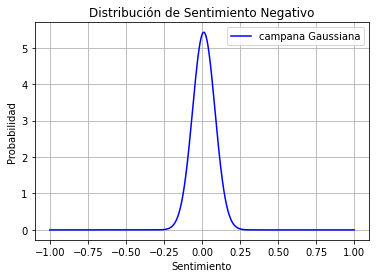

In [55]:
x=np.linspace(-1,1,1000)
pdf=(1/(desviacionEstandarNegativo*np.sqrt(2*np.pi)))*np.exp(-(x-MediaSentimientoNegativo)**2/(2*VarSentimientoNegativo))



plt.plot(x,pdf,color='blue', label='campana Gaussiana')
plt.xlabel('Sentimiento')
plt.ylabel('Probabilidad')
plt.title('Distribución de Sentimiento Negativo')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_5206/2503550726.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  pdf2=(1/(desviacionEstandarPositivo*np.sqrt(2*np.pi)))*np.exp(-(x-MediaSentimientoPositivo)**2/(2*VarSentimientoPositivo))
/tmp/ipykernel_5206/2503550726.py:3: RuntimeWarning: divide by zero encountered in true_divide
  pdf2=(1/(desviacionEstandarPositivo*np.sqrt(2*np.pi)))*np.exp(-(x-MediaSentimientoPositivo)**2/(2*VarSentimientoPositivo))
/tmp/ipykernel_5206/2503550726.py:3: RuntimeWarning: invalid value encountered in multiply
  pdf2=(1/(desviacionEstandarPositivo*np.sqrt(2*np.pi)))*np.exp(-(x-MediaSentimientoPositivo)**2/(2*VarSentimientoPositivo))


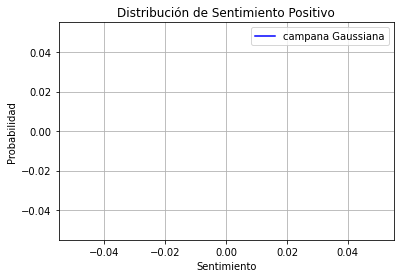

In [56]:
#pdf=(1/(desviacionEstandarNegativo*np.sqrt(2*np.pi)))*np.exp(-(x-MediaSentimientoNegativo)**2/(2*VarSentimientoNegativo))

pdf2=(1/(desviacionEstandarPositivo*np.sqrt(2*np.pi)))*np.exp(-(x-MediaSentimientoPositivo)**2/(2*VarSentimientoPositivo))



plt.plot(x,pdf2,color='blue', label='campana Gaussiana')
plt.xlabel('Sentimiento')
plt.ylabel('Probabilidad')
plt.title('Distribución de Sentimiento Positivo')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
#Añadir el tipo de sentimiento
tweets_pd_df['sentimiento_tipo'] = 'Neutro'  # Por defecto, consideramos que es neutro

# Actualizar la columna 'sentimiento_tipo' para los tweets positivos
tweets_pd_df.loc[tweets_pd_df['sentiment'] > 0, 'sentimiento_tipo'] = 'Positivo'

# Actualizar la columna 'sentimiento_tipo' para los tweets negativos
tweets_pd_df.loc[tweets_pd_df['sentiment'] < -0, 'sentimiento_tipo'] = 'Negativo'

# Verificar el resultado
tweets_pd_df


,user,mensaje,likes,sentiment,sentimiento_tipo
0,vazquezsue,La Universidad de Murcia se enorgullece de su ...,413,0.033333,Positivo
1,samanthasmith,En la Universidad de Barcelona no solo encuent...,929,0.000000,Neutro
2,alexanderreynolds,La Universidad de Santiago de Compostela es un...,932,0.000000,Neutro
3,connielee,En la Universitat de Lleida no solo encuentro ...,395,0.000000,Neutro
4,zacharyjackson,La Universidad de Jaén es una institución que ...,119,0.000000,Neutro
...,...,...,...,...,...
995,riggsmelanie,¡La Universidad de La Laguna me tiene completa...,583,0.000000,Neutro
996,gkelley,La Universidad de Alcalá tiene una ubicación p...,16,0.000000,Neutro
997,zmeyers,Estudiar en la Universidad de Valencia es una ...,502,0.000000,Neutro
998,andreaanderson,"En la Universitat de les Illes Balears, el con...",804,0.100000,Positivo


In [64]:
import pandas as pd

# Filtrar los mensajes positivos
mensajes_positivos = tweets_pd_df[tweets_pd_df['sentimiento_tipo'] == 'Positivo']

# Definir la función para buscar el primer # y extraer el texto que le sigue
def buscar_texto_despues_hashtag(mensaje):
    patron = r"#(\w+)"  # Patrón regex para encontrar el primer "#" seguido de palabras
    resultado = re.search(patron, mensaje)
    if resultado:
        return resultado.group(1)  # Devolver el texto que sigue al primer "#"
    else:
        return None  # Devolver None si no se encuentra "#"

# Aplicar la función a los mensajes positivos y crear una nueva columna 'texto_despues_hashtag'
mensajes_positivos['Iniciales'] = mensajes_positivos['mensaje'].apply(buscar_texto_despues_hashtag)

# Filtrar los mensajes positivos con texto después del hashtag encontrado
mensajes_positivos_con_hashtag = mensajes_positivos.dropna(subset=['Iniciales'])

# Ver los mensajes positivos con texto después del hashtag encontrado
print(mensajes_positivos_con_hashtag[['mensaje', 'Iniciales']])


                                               mensaje Iniciales
127  La Universidad de Alicante es un espacio de ap...        UA
164  La Universidad de Jaén es un espacio de aprend...       UJA
545  La Universidad de Barcelona es un espacio de a...        UB
623  La Universidad de Alcalá es un espacio de apre...       UAH
882  La Universidad de Barcelona es un espacio de a...        UB
941  La Universitat de Girona es un espacio de apre...       UDG


/tmp/ipykernel_5206/2508106971.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mensajes_positivos['Iniciales'] = mensajes_positivos['mensaje'].apply(buscar_texto_despues_hashtag)


In [65]:
mensajes_positivos

,user,mensaje,likes,sentiment,sentimiento_tipo,Iniciales
127,vazquezdana,La Universidad de Alicante es un espacio de ap...,102,0.9,Positivo,UA
164,martinezkaren,La Universidad de Jaén es un espacio de aprend...,322,0.9,Positivo,UJA
545,ashleysmith,La Universidad de Barcelona es un espacio de a...,753,0.9,Positivo,UB
623,ntaylor,La Universidad de Alcalá es un espacio de apre...,357,0.9,Positivo,UAH
882,danielrhodes,La Universidad de Barcelona es un espacio de a...,815,0.9,Positivo,UB
941,rhonda34,La Universitat de Girona es un espacio de apre...,213,0.9,Positivo,UDG


In [ ]:

# Filtrar los mensajes positivos
mensajes_positivos = tweets_pd_df[tweets_pd_df['sentimiento_tipo'] == 'Neutro']

# Definir la función para buscar el primer # y extraer el texto que le sigue
def buscar_texto_despues_hashtag(mensaje):
    patron = r"#(\w+)"  # Patrón regex para encontrar el primer "#" seguido de palabras
    resultado = re.search(patron, mensaje)
    if resultado:
        return resultado.group(1)  # Devolver el texto que sigue al primer "#"
    else:
        return None  # Devolver None si no se encuentra "#"

# Aplicar la función a los mensajes positivos y crear una nueva columna 'texto_despues_hashtag'
mensajes_positivos['Iniciales'] = mensajes_positivos['mensaje'].apply(buscar_texto_despues_hashtag)

# Filtrar los mensajes positivos con texto después del hashtag encontrado
mensajes_positivos_con_hashtag = mensajes_positivos.dropna(subset=['Iniciales'])

# Ver los mensajes positivos con texto después del hashtag encontrado
print(mensajes_positivos_con_hashtag[['mensaje', 'Iniciales']])

In [15]:
# Carga los datos de los tweets inventados en un DataFrame
tweets_df = spark.read.csv("file:///home/student/Downloads/tweetsMejorado.csv", header=True, sep=',')



# Palabras clave para tweets positivos y negativos
palabras_clave_positivas = ["privilegio", "maravilloso", "increíble", "genial", "emocionado","calidad"
                           ,"diversidad","paradisíacas","crecimiento","amigable","ideal","acogedora"]




palabras_clave_negativas = ["triste", "decepcionado", "odio", "mal", "falta","desfasados","incompetencia","carece","corrupción","indignado","pesadilla","deficiente","discriminación","competitivo","muere","desigualdad","tortura","desalentadora","monotonía"]

In [69]:
tweets_pd_df_sorted

,user,mensaje,likes,sentiment
67,jasonjuarez,En la Universidad de Cantabria no solo encuent...,983,-0.25
823,julie76,En la Universidad de Sevilla no solo encuentro...,741,-0.25
961,richard39,En la Universidad Autónoma de Madrid no solo e...,440,-0.25
451,joyce29,En la Universitat Pompeu Fabra no solo encuent...,536,-0.25
756,christopher03,En la Universidad de Navarra no solo encuentro...,564,-0.25
...,...,...,...,...
623,ntaylor,La Universidad de Alcalá es un espacio de apre...,357,0.90
127,vazquezdana,La Universidad de Alicante es un espacio de ap...,102,0.90
882,danielrhodes,La Universidad de Barcelona es un espacio de a...,815,0.90
941,rhonda34,La Universitat de Girona es un espacio de apre...,213,0.90
